## Theoretical Analysis

The analysis of robotic systems requires a rigorous mathematical framework to describe the spatial relationship between rigid bodies in three-dimensional Euclidean space. This laboratory exercise employs the Special Euclidean Group ($SE(3)$), which formalizes rigid body motions through combinations of rotation and translation.

**Coordinate Frames and the Right-Hand Rule**

A coordinate frame $\{A\}$ is defined by an origin point $O_A$ and a basis of three mutually orthogonal unit vectors: $\hat{x}_A$, $\hat{y}_A$, and $\hat{z}_A$. To ensure consistency in vector cross-products and kinematic derivations, all coordinate systems in robotics must adhere to the Right-Hand Rule. This rule establishes the orientation of the Z-axis relative to the X and Y axes according to the cross-product relationship:$$\hat{z} = \hat{x} \times \hat{y}$$
This convention is critical when assigning frames to manipulator links (e.g., Denavit-Hartenberg parameters) to ensure that positive rotations correspond to the counter-clockwise direction around an axis. 

**Orientation: The Special Orthogonal Group ($SO(3)$)**

The orientation of a target frame $\{B\}$ relative to a reference frame $\{A\}$ is represented by a $3 \times 3$ Rotation Matrix, denoted as ${}^{A}R_{B}$. This matrix belongs to the Special Orthogonal Group ($SO(3)$), which is characterized by two fundamental properties:

    1. Orthonormality: The columns of the matrix are mutually orthogonal unit vectors.
    2. Determinant: The determinant of the matrix is strictly $+1$ (preserving proper rotation without reflection)
Mathematically, the columns of ${}^{A}R_{B}$ are the unit vectors of frame $\{B\}$ expressed in the coordinates of frame $\{A\}$:
$${}^{A}R_{B} = \left[ \begin{array}{ccc} {}^{A}\hat{x}_B & {}^{A}\hat{y}_B & {}^{A}\hat{z}_B \end{array} \right]$$
A crucial property of rotation matrices is that their inverse is equal to their transpose. This allows for the computationally efficient inversion of orientation without calculating determinants or adjugates:
$${}^{A}R_{B}^{-1} = {}^{A}R_{B}^{T} = {}^{B}R_{A}$$ 

**Homogeneous Transformation Matrices**

While rotation matrices describe orientation, they do not account for position. To describe the full pose (position and orientation) of a rigid body, we extend the 3-dimensional space into a 4-dimensional projective space. This allows an affine transformation (linear rotation followed by translation) to be represented as a single linear matrix multiplication.The Homogeneous Transformation Matrix, ${}^{A}T_{B}$, describes frame $\{B\}$ relative to frame $\{A\}$ and is constructed as a $4 \times 4$ block matrix:
$${}^{A}T_{B} = \left[ \begin{array}{c|c} {}^{A}R_{B} & {}^{A}P_{Borg} \\ \hline \mathbf{0}_{1 \times 3} & 1 \end{array} \right]$$
Where:
    ${}^{A}R_{B}$ is the $3 \times 3$ Rotation Matrix.
    ${}^{A}P_{Borg}$ is the $3 \times 1$ Translation Vector (position of the origin of $\{B\}$).
    $\mathbf{0}_{1 \times 3}$ is the row vector $[0, 0, 0]$, representing the perspective transformation (which is zero for rigid bodies). 
    
**Composition and Inversion of Transformations**

The primary advantage of using homogeneous matrices is the ability to compose complex kinematic chains through matrix multiplication. If frame $\{B\}$ is defined relative to $\{A\}$, and frame $\{C\}$ is defined relative to $\{B\}$, the transformation from $\{A\}$ directly to $\{C\}$ is:
$${}^{A}T_{C} = {}^{A}T_{B} \cdot {}^{B}T_{C}$$
It is important to note that matrix multiplication is non-commutative; the order of operations signifies whether a transformation occurs relative to the fixed frame (pre-multiplication) or the current moving frame (post-multiplication).

Finally, the inverse of a homogeneous transform, ${}^{B}T_{A}$, cannot be found by simple transposition due to the translation vector. Instead, the analytic inverse is derived as:
$${}^{A}T_{B}^{-1} = \left[ \begin{array}{cc} {}^{A}R_{B}^{T} & -{}^{A}R_{B}^{T} \cdot {}^{A}P_{Borg} \\ 0 & 1 \end{array} \right]$$

This formula is computationally efficient and numerically stable, making it ideal for real-time robotic control algorithms.

# Robotics Toolbox: Homogeneous Transformations

## 1. The Homogeneous Matrix ($4 \times 4$)

In robotics, we use $4 \times 4$ matrices to represent both **Rotation** (orientation) and **Translation** (position) in a single structure.

$$
T = \begin{bmatrix}
R & P \\
0 & 1
\end{bmatrix}
$$

* **R (Rotation):** The top-left $3 \times 3$ sub-matrix. Columns represent the unit vectors of the new frame axes ($\hat{x}, \hat{y}, \hat{z}$).
* **P (Position):** The top-right $3 \times 1$ vector ($t_x, t_y, t_z$).
* **Scale:** The bottom row is $[0, 0, 0, 1]$ for rigid body transformations.

## 2. Elementary Transformations

We compose complex movements by multiplying these basic matrices:

1. **Rotation X ($\theta$):**
   $$
   R_x(\theta) = \begin{bmatrix}
   1 & 0 & 0 & 0 \\
   0 & \cos\theta & -\sin\theta & 0 \\
   0 & \sin\theta & \cos\theta & 0 \\
   0 & 0 & 0 & 1
   \end{bmatrix}
   $$

2. **Rotation Y ($\theta$):**
   $$
   R_y(\theta) = \begin{bmatrix}
   \cos\theta & 0 & \sin\theta & 0 \\
   0 & 1 & 0 & 0 \\
   -\sin\theta & 0 & \cos\theta & 0 \\
   0 & 0 & 0 & 1
   \end{bmatrix}
   $$

3. **Rotation Z ($\theta$):**
   $$
   R_z(\theta) = \begin{bmatrix}
   \cos\theta & -\sin\theta & 0 & 0 \\
   \sin\theta & \cos\theta & 0 & 0 \\
   0 & 0 & 1 & 0 \\
   0 & 0 & 0 & 1
   \end{bmatrix}
   $$

4. **Translation ($x, y, z$):**
   $$
   Trans(x, y, z) = \begin{bmatrix}
   1 & 0 & 0 & x \\
   0 & 1 & 0 & y \\
   0 & 0 & 1 & z \\
   0 & 0 & 0 & 1
   \end{bmatrix}
   $$

## 3. Important Rules

* **Radians:** Python trig functions (`np.cos`, `np.sin`) use Radians. Use `deg2rad` to convert.
* **Operator `@`:** In Python (NumPy), use the `@` symbol for matrix multiplication.
* **Order Matters:** Matrix multiplication is non-commutative. $A \cdot B \neq B \cdot A$.
* **Global Frame (Fixed):** To rotate around the *original* fixed axes, pre-multiply:
  $$T_{new} = Rot \cdot T_{old}$$
* **Local Frame (Moving):** To rotate around the *current* moving axes, post-multiply:
  $$T_{new} = T_{old} \cdot Rot$$

In [10]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# --- 1. MATH FUNCTIONS ---

def deg2rad(degrees):
    return degrees * np.pi / 180

def rotx(theta):
    c = np.cos(deg2rad(theta))
    s = np.sin(deg2rad(theta))
    return np.array([
        [1, 0,  0, 0],
        [0, c, -s, 0],
        [0, s,  c, 0],
        [0, 0,  0, 1]
    ])

def roty(theta):
    c = np.cos(deg2rad(theta))
    s = np.sin(deg2rad(theta))
    return np.array([
        [ c, 0, s, 0],
        [ 0, 1, 0, 0],
        [-s, 0, c, 0],
        [ 0, 0, 0, 1]
    ])

def rotz(theta):
    c = np.cos(deg2rad(theta))
    s = np.sin(deg2rad(theta))
    return np.array([
        [c, -s, 0, 0],
        [s,  c, 0, 0],
        [0,  0, 1, 0],
        [0,  0, 0, 1]
    ])

def trans(dx, dy, dz):
    return np.array([
        [1, 0, 0, dx],
        [0, 1, 0, dy],
        [0, 0, 1, dz],
        [0, 0, 0, 1]
    ])

def inv_trans(T):
    """
    Computes the inverse of a 4x4 Homogeneous Matrix T efficiently.
    Uses the property that for Rotation matrices, R^-1 == R.T
    """
    # 1. Extract Rotation (3x3) and Translation (3x1)
    R = T[:3, :3]
    p = T[:3, 3]
    
    # 2. Create Identity matrix for the result
    T_inv = np.eye(4)
    
    # 3. Apply the transpose to the rotation part
    T_inv[:3, :3] = R.T

    # 4. Calculate new translation: -R^T * p
    T_inv[:3, 3] = -R.T @ p
    
    return T_inv

def transform_point(T, point):
    """
    Applies transformation T to a 3D point (x, y, z).
    Returns the new 3D point.
    """
    # Convert to homogeneous coordinates [x, y, z, 1]
    p_h = np.array([point[0], point[1], point[2], 1.0])
    
    # Apply transformation
    p_new_h = T @ p_h
    
    # Return as 3D vector [x, y, z]
    return p_new_h[:3]

# --- 2. PLOTTING HELPERS ---

def plot_coordinate_frame(ax, T, label="Frame", length=1.0, style='-'):
    """Helper to plot X, Y, Z vectors of a frame."""
    origin = T[:3, 3]
    R = T[:3, :3]
    
    # Extract basis vectors from the Rotation matrix
    x_axis = R[:, 0]
    y_axis = R[:, 1]
    z_axis = R[:, 2]
    
    # Plot X (Red), Y (Green), Z (Blue)
    ax.quiver(*origin, *x_axis, length=length, color='r', linestyle=style)
    ax.quiver(*origin, *y_axis, length=length, color='g', linestyle=style)
    ax.quiver(*origin, *z_axis, length=length, color='b', linestyle=style)
    
    ax.text(*origin, label, color='k')

# --- 3. MAIN VISUALIZER ---

def visualize_frame(T, point=None):
    """
    Visualizes the World Frame, the Transformed Frame (T), 
    and optionally transforms a specific point.
    """
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # 1. Plot World Frame (Identity)
    plot_coordinate_frame(ax, np.eye(4), label="World", length=1.5, style='--')
    
    # 2. Plot Transformed Frame (T)
    plot_coordinate_frame(ax, T, label="New Frame", length=1.0, style='-')
    
    # Draw line from World Origin to New Frame Origin
    origin_new = T[:3, 3]
    ax.plot([0, origin_new[0]], [0, origin_new[1]], [0, origin_new[2]], 'k:', alpha=0.3)

    # 3. Handle Point Transformation (if provided)
    if point is not None:
        # Calculate new position
        p_new = transform_point(T, point)
        
        # Plot Original Point (Grey 'x')
        ax.scatter(point[0], point[1], point[2], c='gray', marker='x', s=100, label='Original Point')
        
        # Plot Transformed Point (Magenta 'o')
        ax.scatter(p_new[0], p_new[1], p_new[2], c='m', marker='o', s=100, label='Transformed Point')
        
        # Optional: Draw a line showing the point's movement
        ax.plot([point[0], p_new[0]], [point[1], p_new[1]], [point[2], p_new[2]], 'm--', alpha=0.5)
        
        print(f"Original Point:  {point}")
        print(f"Transformed Point: {p_new}")
        ax.legend()

    # 4. Set Plot Limits & Labels
    # Gather all points of interest to auto-scale the plot
    points_of_interest = [
        [0,0,0], T[:3, 3],  # Origins
    ]
    if point is not None:
        points_of_interest.append(point)
        points_of_interest.append(p_new)
        
    points_of_interest = np.array(points_of_interest)
    max_range = np.max(np.abs(points_of_interest)) + 1.5
    
    ax.set_xlim([-max_range, max_range])
    ax.set_ylim([-max_range, max_range])
    ax.set_zlim([-max_range, max_range])
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title("Transformation Visualizer")
    
    plt.show()


def pprint(T, label=None):
    """
    Pretty prints a 4x4 matrix using SymPy.
    Snaps small floating point errors (e.g., 1e-17) to 0.
    """
    if label:
        print(f"--- {label} ---")
        
    # nsimplify cleans up floating point noise (e.g. 6.12e-17 -> 0)
    # and converts clean decimals to rationals (e.g. 1.5 -> 3/2)
    clean_matrix = sp.nsimplify(sp.Matrix(T), tolerance=1e-10, rational=True)
    sp.pprint(clean_matrix)
    print("") # Add a newline for spacing


## Exercise 2

In [11]:
T2 = np.array([
        [ 1, 0, 0, 3],
        [ 0, 1/np.sqrt(2), -1/np.sqrt(2), 5],
        [0, 1/np.sqrt(2), 1/np.sqrt(2), 7],
        [ 0, 0, 0, 1]
    ])

print("This Matrix represents the inverse matrix of T2")
print(" ")
print(inv_trans(T2))

This Matrix represents the inverse matrix of T2
 
[[ 1.          0.          0.         -3.        ]
 [ 0.          0.70710678  0.70710678 -8.48528137]
 [ 0.         -0.70710678  0.70710678 -1.41421356]
 [ 0.          0.          0.          1.        ]]


## Exercise 3

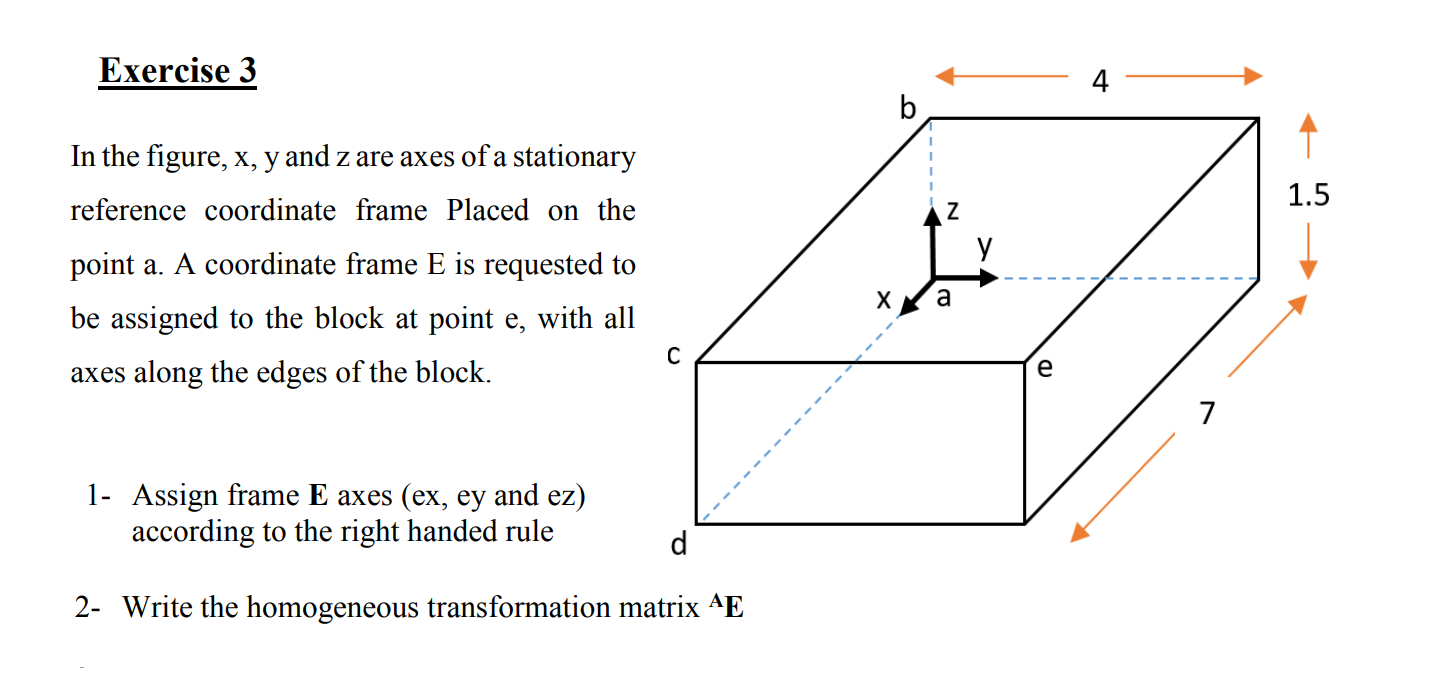

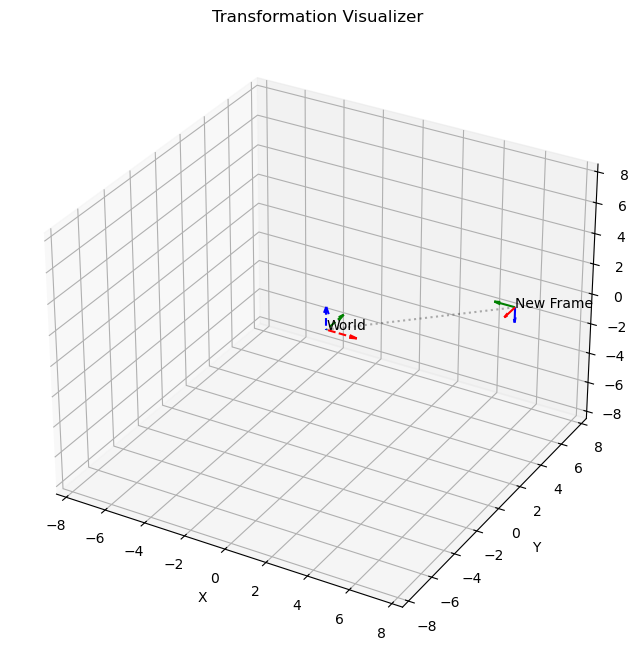

--- Final Transformation Matrix ---
⎡0   -1  0    7 ⎤
⎢               ⎥
⎢-1  0   0    4 ⎥
⎢               ⎥
⎢0   0   -1  3/2⎥
⎢               ⎥
⎣0   0   0    1 ⎦



In [15]:

#1
T =  trans(7, 4, 1.5)
#2
R1 = rotz(90)
#3
R2 = roty(180)
# which means first translate along intrinsic axis then rotate along current z by 90 then current y by 180
T_final = T @ R1 @ R2
#this represents the intrinsic/current frame orientation
# 2. Call the function with ONLY the matrix
visualize_frame(T_final)
pprint(T_final, label="Final Transformation Matrix")

#Note: when you look at the frame you are viewing 'The box ' from the side abcd , In order to have the same perspective as the box above, 
#visualize the frame from the 'front' or visaluze the box from side abcd as the side 'looking' at you

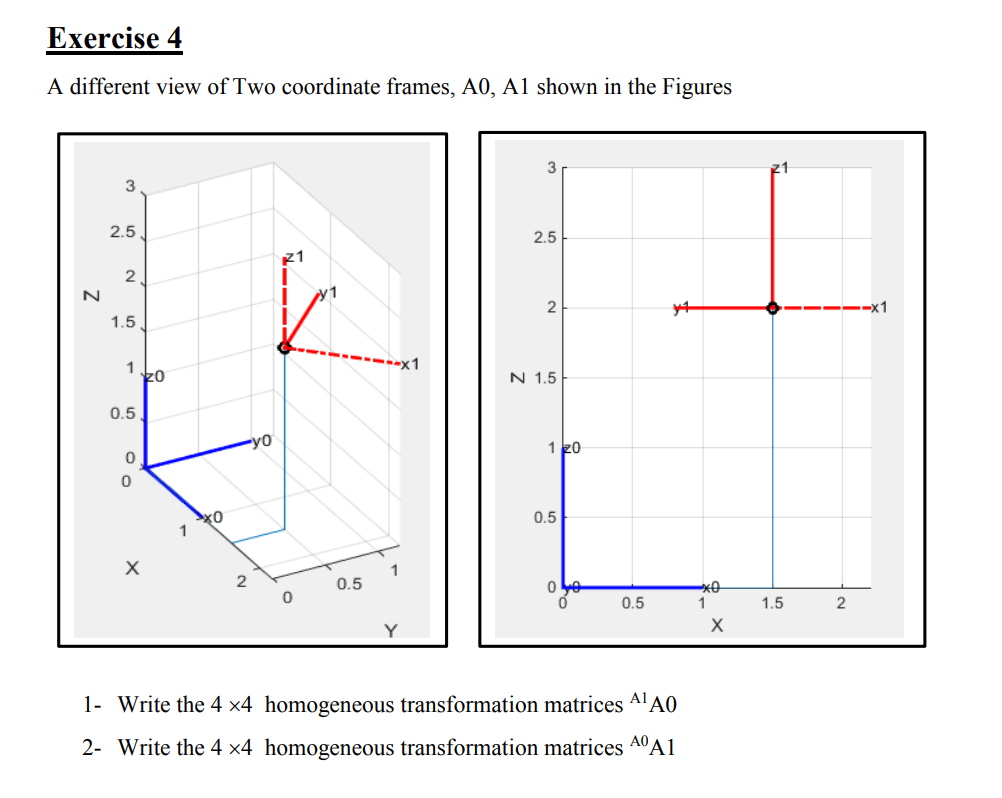

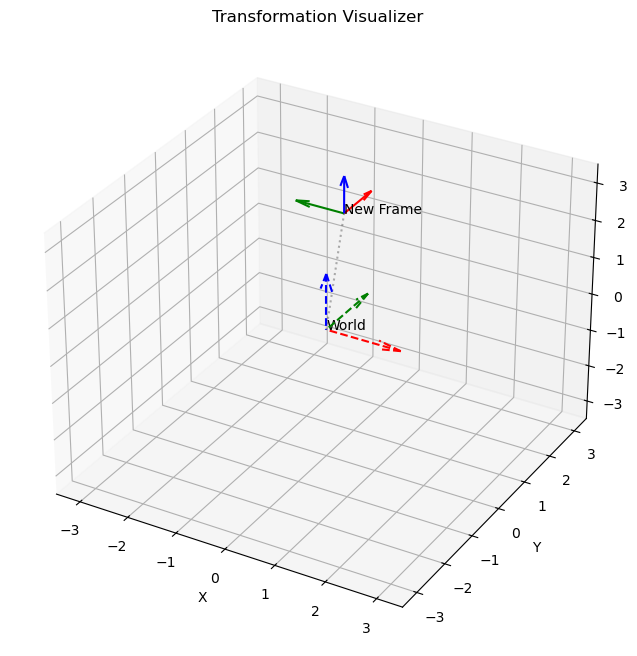

--- A1_T_A0 ---
⎡0  -1  0  -1/2⎤
⎢              ⎥
⎢1  0   0  3/2 ⎥
⎢              ⎥
⎢0  0   1   2  ⎥
⎢              ⎥
⎣0  0   0   1  ⎦



In [26]:
#Rationale
#We will use an extrinsic rotation which takes place in the following order
#1. Translation (1.5,0.5,2) along world frame then rotation about Z0 by 90
#1
T =  trans(1.5, 0.5, 2)
#2
R1 = rotz(90)

# extrinsic roation so we reverse the order
T_4 = R1 @ T

# Call the function with the matrix
visualize_frame(T_4)
pprint(T_4, label="A1_T_A0")

#This solution is much easier to visualize. It easy to see how the frame A0 is trasformed into frame A1

In [28]:
#Part 2
#Part 2 is simple, just apply the inverse of the matrix in part one
print("This Matrix represents the inverse matrix of T4")
print(" ")
T_inv = inv_trans(T_4)

pprint(T_inv, label="A0_T_A1")


This Matrix represents the inverse matrix of T4
 
--- A0_T_A1 ---
⎡0   1  0  -3/2⎤
⎢              ⎥
⎢-1  0  0  -1/2⎥
⎢              ⎥
⎢0   0  1   -2 ⎥
⎢              ⎥
⎣0   0  0   1  ⎦



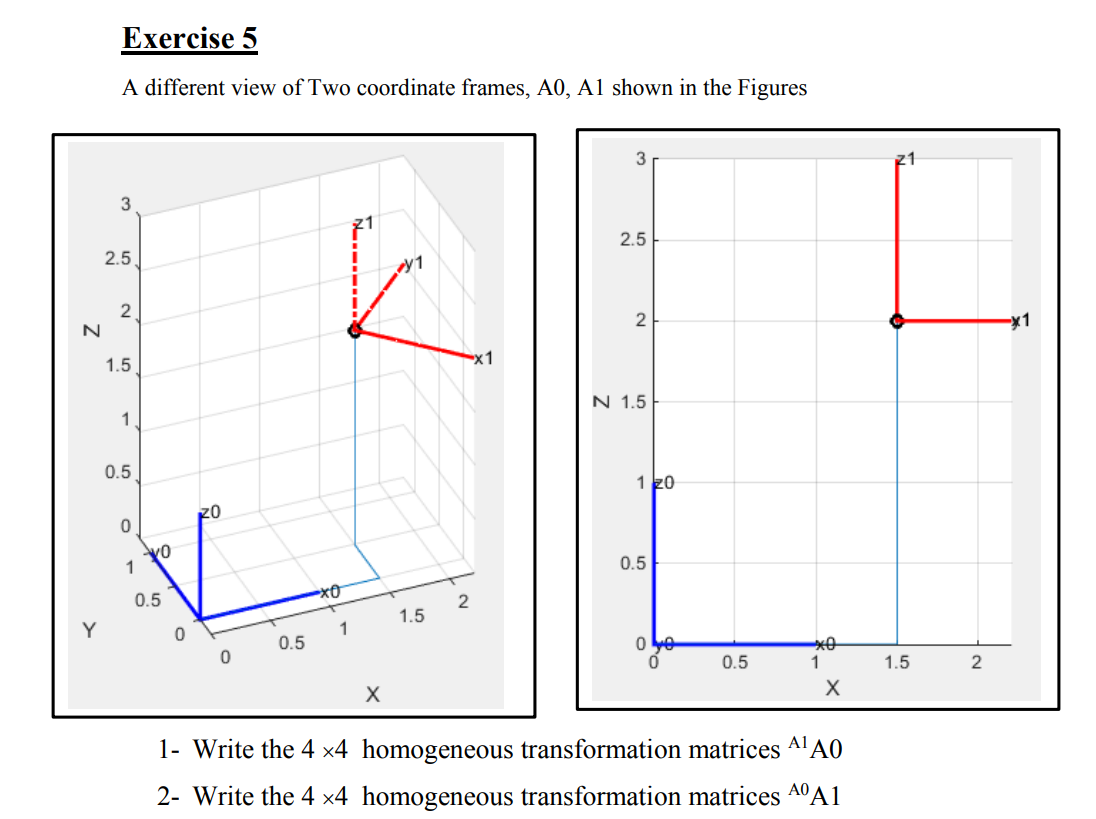

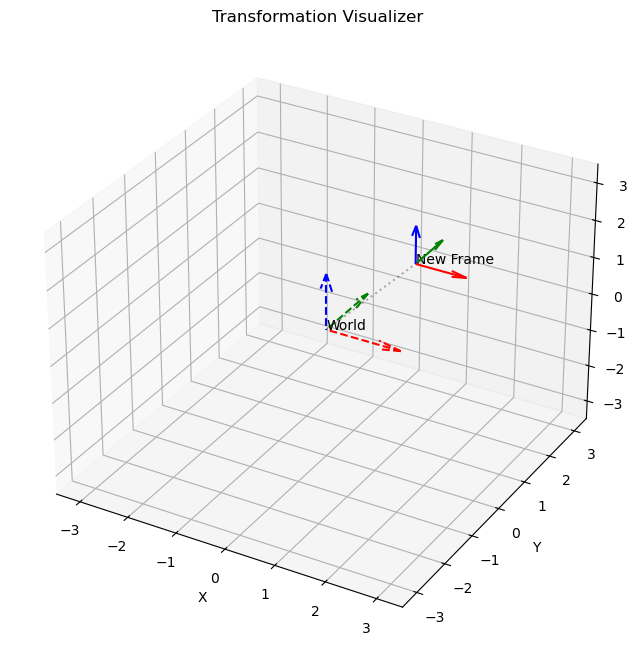

--- A1_T_A0 ---
⎡1  0  0  3/2⎤
⎢            ⎥
⎢0  1  0  1/2⎥
⎢            ⎥
⎢0  0  1   2 ⎥
⎢            ⎥
⎣0  0  0   1 ⎦



In [29]:
#We follow the exact same route as question 4

#We will use an extrinsic rotation which takes place in the following order
#From image one it seems a rotation has occurred but from image 2 we see no rotaion has occurred
#1. Translation (1.5,0.5,2) along world frame 
#1
T =  trans(1.5, 0.5, 2)
#2


# extrinsic roation so we reverse the order
T_5 =  T

# Call the function with the matrix
visualize_frame(T_5)
pprint(T_5, label="A1_T_A0")



In [30]:
#Part 2
#Part 2 is simple, just apply the inverse of the matrix in part one
print("This Matrix represents the inverse matrix of T5")
print(" ")
T_inv = inv_trans(T_5)

pprint(T_inv, label="A0_T_A1")


This Matrix represents the inverse matrix of T5
 
--- A0_T_A1 ---
⎡1  0  0  -3/2⎤
⎢             ⎥
⎢0  1  0  -1/2⎥
⎢             ⎥
⎢0  0  1   -2 ⎥
⎢             ⎥
⎣0  0  0   1  ⎦



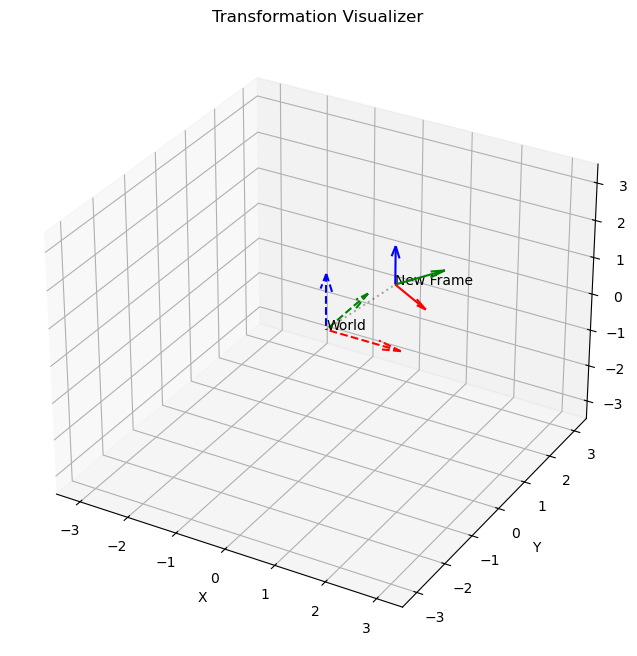

--- A1_T_A0 ---
⎡6638599631                 12551139540 ⎤
⎢──────────     1/2      0  ─────────── ⎥
⎢7665594568                 8102537629  ⎥
⎢                                       ⎥
⎢            6638599631     -1169628095 ⎥
⎢   -1/2     ──────────  0  ────────────⎥
⎢            7665594568      3689826381 ⎥
⎢                                       ⎥
⎢    0           0       1       2      ⎥
⎢                                       ⎥
⎣    0           0       0       1      ⎦



In [32]:
# let us assume a rotation about the reference z frame occured after the translation

#Rationale
#We will use an extrinsic rotation which takes place in the following order
#1. Translation (1.5,0.5,2) along world frame then rotation about Z0 by -30
#1
T =  trans(1.5, 0.5, 2)
#2
R1 = rotz(-30)

# extrinsic roation so we reverse the order
T_test = R1 @ T

# Call the function with the matrix
visualize_frame(T_test)
pprint(T_test, label="A1_T_A0")

#This solution is much easier to visualize. It easy to see how the frame A0 is trasformed into frame A1
#NB now it looks like the image